## TM-TV exercise

0. import resources

In [15]:
import nltk 
import spacy

from collections import defaultdict
import csv
import ast
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd

import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models import CoherenceModel, LdaModel
from gensim import corpora, similarities, utils
from gensim.models.phrases import Phrases, Phraser, ENGLISH_CONNECTOR_WORDS


warnings.filterwarnings('ignore') # setting ignore as a parameter

nlp = spacy.load("en_core_web_trf")
stopwords = nltk.corpus.stopwords.words('english')

print("Libraries imported successfully!")

Libraries imported successfully!


1. Create the corpus -> dictionary with frequency of words for each document and dictionary with tags associated (for further analysis)

1.1 Choose documents

1.2 Pre processing

1.3 Create the dictionary with frequencies 

In [77]:
path = f'resources/inshort_news_data-5.csv'
path_corpus = f'resources/corpus.txt'
path_target = f'resources/target.txt'
features = []

def load_corpus():
    if not os.path.exists(path_corpus):
        texts = []
        targets = []

        with open(path, 'r', encoding='utf-8') as f:
            reader = csv.reader(f)
            i = 0
            for article in reader:
                if i == 0: 
                    features = article.insert(0, "id")
                    i += 1
                else:
                    text = article[2].replace("\n", " ")
                    texts.append(text)
                    target = article[3]
                    targets.append(target)
                    i += 1
    
        with open (path_corpus, 'w', encoding='utf-8') as f:
            for text in texts:
                f.write('"'+text+'"'+"\n")

        with open (path_target, 'w', encoding='utf-8') as f:
            for target in targets:
                f.write(target+"\n")
    else: 
        
        texts = []
        with open(path_corpus, 'r', encoding='utf-8') as f:
            texts = f.readlines()
            texts = [text.replace('"', '') for text in texts]

        targets = []
        with open(path_target, 'r', encoding='utf-8') as f:
            targets = f.readlines()
    
    return texts, targets

texts, targets = load_corpus()

n_topics = len(list(set(targets)))

print("Number of topics: ", n_topics)

print("Distribution topics: ", dict(pd.Series(targets).value_counts()))

Number of topics:  7
Distribution topics:  {'technology\n': 50, 'sports\n': 50, 'world\n': 50, 'politics\n': 50, 'entertainment\n': 50, 'automobile\n': 50, 'science\n': 50}


2. Create the model 

2.1 Pre processing

2.2 Building Dictionary & Corpus for Topic Model

2.3 Building LDA Topic Model

In [86]:
# Tokenization

def texts_to_tokens(texts: list): 
     texts_token = []
     for text in texts:
          text_tokens = nlp(text)
          text_tokens = [token.lemma_ for token in text_tokens if len(token.text) > 2 and not token.is_stop and \
                not token.is_punct and token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']]
          text_tokens = list(set(text_tokens))
          texts_token.append(text_tokens)

     return texts_token

def add_bigrams(texts_token: list):
     bigram = Phrases(texts_token, min_count=5, threshold=100, connector_words=ENGLISH_CONNECTOR_WORDS)
     for idx in range(len(texts_token)):
          for token in bigram[texts_token[idx]]:
               if '_' in token and token not in texts_token[idx]:
                    texts_token[idx].append(token)

     return texts_token


texts_token = texts_to_tokens(texts)
print("Tokenization done!")
texts_token = add_bigrams(texts_token)
print("added bigrams!")

Tokenization done!
added bigrams!


In [87]:
dictionary = corpora.Dictionary(texts_token)
corpus = [dictionary.doc2bow(text) for text in texts_token]

lda_model = LdaModel(corpus=corpus, num_topics=7, id2word=dictionary, random_state=100)
lda_model.show_topics()

[(0,
  '0.022*"say" + 0.006*"add" + 0.006*"year" + 0.006*"base" + 0.006*"early" + 0.005*"new" + 0.005*"talk" + 0.005*"believe" + 0.005*"team" + 0.004*"cause"'),
 (1,
  '0.016*"say" + 0.012*"add" + 0.009*"take" + 0.008*"time" + 0.008*"year" + 0.007*"company" + 0.007*"supporter" + 0.006*"share" + 0.006*"tweet" + 0.005*"new"'),
 (2,
  '0.017*"say" + 0.009*"add" + 0.008*"report" + 0.006*"come" + 0.006*"accord" + 0.006*"scientist" + 0.005*"second" + 0.005*"short" + 0.005*"time" + 0.005*"year"'),
 (3,
  '0.031*"say" + 0.019*"add" + 0.012*"year" + 0.006*"government" + 0.006*"see" + 0.006*"country" + 0.005*"leader" + 0.005*"run" + 0.005*"car" + 0.005*"state"'),
 (4,
  '0.026*"say" + 0.010*"tweet" + 0.010*"add" + 0.007*"work" + 0.006*"government" + 0.006*"write" + 0.005*"vaccine" + 0.005*"report" + 0.005*"country" + 0.004*"vehicle"'),
 (5,
  '0.022*"say" + 0.013*"add" + 0.006*"second" + 0.006*"time" + 0.005*"account" + 0.005*"company" + 0.005*"follow" + 0.005*"social" + 0.005*"recently" + 0.005

3. Visualizations of the model 

In [88]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.038997 -0.005873       1        1  19.924977
1      0.030002 -0.020524       2        1  15.620991
6      0.048524  0.056495       3        1  14.641830
0     -0.082295  0.117986       4        1  13.285970
4      0.058269 -0.029874       5        1  13.202380
5      0.035845 -0.034723       6        1  12.560414
2     -0.129342 -0.083488       7        1  10.763438, topic_info=            Term       Freq      Total Category  logprob  loglift
99          base  14.000000  14.000000  Default  30.0000  30.0000
62          year  39.000000  39.000000  Default  29.0000  29.0000
250         work  19.000000  19.000000  Default  28.0000  28.0000
1407   scientist   8.000000   8.000000  Default  27.0000  27.0000
227   government  19.000000  19.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
25         tweet   2.758962  27.273851   Topic7  -5.6221  -0.0621
95         world   2.466869  17.413544   Topic7  -5.7341   0.2747
904        order   2.226521   7.770834   Topic7  -5.8366   0.9791
954        large   2.312528  11.680388   Topic7  -5.7987   0.6094
39         state   2.288579  15.440062   Topic7  -5.8091   0.3200

[508 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
530       2  0.861886    10th
622       1  0.112281  accord
622       2  0.280702  accord
622       3  0.056140  accord
622       4  0.112281  accord
...     ...       ...     ...
62        3  0.075170    year
62        4  0.150340    year
62        5  0.050113    year
62        7  0.100227    year
1448      7  0.904676    zone

[1036 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 7, 1, 5, 6, 3])

In [89]:
for i in range(len(texts)):
    print(lda_model[corpus][i])

[(4, 0.9713331)]
[(5, 0.9462899)]
[(3, 0.96095246)]
[(5, 0.9626779)]
[(1, 0.24187675), (5, 0.22083405), (6, 0.5174916)]
[(6, 0.96820605)]
[(3, 0.96256995)]
[(0, 0.9641894)]
[(0, 0.9590435)]
[(0, 0.9723307)]
[(1, 0.97039694)]
[(3, 0.9548362)]
[(1, 0.95707613)]
[(6, 0.9570758)]
[(1, 0.9626694)]
[(1, 0.9693368)]
[(6, 0.9609965)]
[(6, 0.962701)]
[(6, 0.96818405)]
[(1, 0.95707613)]
[(4, 0.95704615)]
[(3, 0.27395743), (4, 0.19501962), (6, 0.50498563)]
[(6, 0.9463661)]
[(6, 0.9626647)]
[(5, 0.96264035)]
[(4, 0.9656529)]
[(0, 0.39014715), (3, 0.5676957)]
[(2, 0.9546996)]
[(5, 0.9547371)]
[(0, 0.94951695)]
[(1, 0.9426626)]
[(5, 0.9547851)]
[(1, 0.22642124), (6, 0.73777443)]
[(4, 0.96090025)]
[(1, 0.96091706)]
[(5, 0.9522769)]
[(3, 0.3150971), (4, 0.64008945)]
[(0, 0.011000521), (1, 0.93398213), (2, 0.010998769), (3, 0.011007216), (4, 0.011004183), (5, 0.011005053), (6, 0.011002103)]
[(0, 0.9570848)]
[(3, 0.96267986)]
[(3, 0.95224214)]
[(4, 0.95905876)]
[(3, 0.5219576), (6, 0.4403265)]
[(3, 0.95

4. Evaluation of the model

In [93]:
# Compute Perplexity
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_token, dictionary=dictionary,
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.614002565427914

Coherence Score:  0.3473605757453651


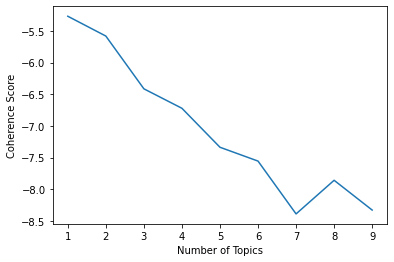

In [82]:
topics = []
score = []
for i in range(1,10,1):
   lda_model_eval = LdaModel(corpus=corpus, num_topics=i, id2word=dictionary, random_state=100)
   cm = CoherenceModel(model=lda_model_eval, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

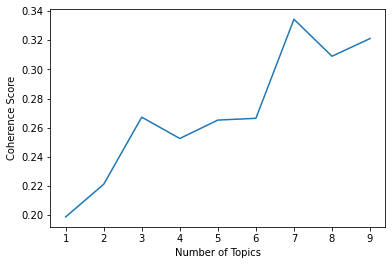

In [83]:
topics = []
score = []
for i in range(1,10,1):
   lda_model_eval = LdaModel(corpus=corpus, id2word=dictionary,num_topics=i, random_state=100)
   cm = CoherenceModel(model=lda_model_eval, texts = texts_token, corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

4. Analysis of the topics using target

In [84]:
topics = [sorted(lda_model[corpus][text])[0][0] for text in range(len(texts))]

topics_df = pd.DataFrame(topics, columns=['topic'])
topics_df['topic'].value_counts().sort_index()

0    44
1    33
2    71
3    47
4    51
5    55
6    49
Name: topic, dtype: int64

In [85]:
y_topic = topics_df['topic'].values
lda_topics = lda_model.show_topics(formatted=False)

lda_topics = [[word for word, prob in topic] for topicid, topic in lda_topics]

for text in range(len(texts)): 
    print("Text: ", text)
    print("Result model: ", lda_topics[y_topic[text]])
    print("Real tags: ", targets[text])

Text:  0
Result model:  ['say', 'add', 'tweet', 'use', 'make', 'call', 'new', 'team', 'third', 'talk']
Real tags:  technology

Text:  1
Result model:  ['say', 'new', 'official', 'add', 'also', 'account', 'tweet', 'ban', 'permanently', 'year']
Real tags:  technology

Text:  2
Result model:  ['say', 'year', 'add', 'see', 'write', 'report', 'vehicle', 'well', 'government', 'also']
Real tags:  technology

Text:  3
Result model:  ['say', 'add', 'work', 'car', 'report', 'vehicle', 'company', 'talk', 'year', 'also']
Real tags:  technology

Text:  4
Result model:  ['say', 'add', 'tweet', 'use', 'make', 'call', 'new', 'team', 'third', 'talk']
Real tags:  technology

Text:  5
Result model:  ['say', 'add', 'work', 'car', 'report', 'vehicle', 'company', 'talk', 'year', 'also']
Real tags:  technology

Text:  6
Result model:  ['say', 'year', 'add', 'see', 'write', 'report', 'vehicle', 'well', 'government', 'also']
Real tags:  technology

Text:  7
Result model:  ['say', 'add', 'make', 'use', 'first',

In [ ]:
# vorrei controllare se effettivamente divisi in argomenti in questo modo i testi sono realmente simili tra loro



